In [1]:
import os

import sys
sys.path.append("C:\\Users\\User\\PycharmProjects\\GIEBN\\src")
sys.path.append("C:\\Users\\User\\PycharmProjects\\GIEBN")
sys.path.append("C:\\Users\\User\\PycharmProjects\\GIEBN\\venv")
sys.path.append("C:\\Users\\User\\PycharmProjects\\GIEBN\\experiments\\experiments3")
# C:\Users\User\PycharmProjects\GIEBN\experiments\experiments3\random_DAG_generation.py
# \experiments\experiments3\exp3aux
# C:\Users\User\PycharmProjects\GIEBN\experiments\experiments3\exp3aux
path = os.getcwd()

curr_path = path.replace('\\', '/')
head_place = curr_path.find('GIEBN')
main_path = curr_path[:head_place]+'GIEBN'
main_path

'c:/Users/User/PycharmProjects/GIEBN'

In [4]:
import numpy as np
import pandas as pd

import exp3aux.exp3aux as ex3aux
from auxiliary.auxiliary import construct_by_quantiles, construct_by_kmeans, construct_by_uniform
#from experiments2.auxiliary.auxiliary import construct_by_kmeans, construct_by_uniform, construct_by_quantiles
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from pgmpy.estimators import K2Score, BicScore

from tqdm import tqdm_notebook

plt.rcParams.update({'font.size': 14})

imagespath = "C:/Users/Acer/PycharmProjects/GIEBN/experiments/experiments3/images"

In [3]:
metrics = ['right_dir', 'wrong_dir', 'asc', 'desc', 'wrong_edges', 'indegree']
stats = ['mean', 'ci95_low', 'ci95_high', 'ci99_low', 'ci99_high']

cols = [f'{x}_{y}' for y in metrics for x in stats]


# ['mean_right_dir', 'min_right_dir', 'max_right_dir',
#                               'mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir',
#                               'mean_asc', 'min_asc', 'max_asc',
#                               'mean_desc', 'min_desc', 'max_desc',
#                               'mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges',
#                               'mean_indegree', 'min_indegree', 'max_indegree'] +\
#                               [f"indegree for actual {k} indegree" for k in range(11)]
cols

['mean_right_dir',
 'ci95_low_right_dir',
 'ci95_high_right_dir',
 'ci99_low_right_dir',
 'ci99_high_right_dir',
 'mean_wrong_dir',
 'ci95_low_wrong_dir',
 'ci95_high_wrong_dir',
 'ci99_low_wrong_dir',
 'ci99_high_wrong_dir',
 'mean_asc',
 'ci95_low_asc',
 'ci95_high_asc',
 'ci99_low_asc',
 'ci99_high_asc',
 'mean_desc',
 'ci95_low_desc',
 'ci95_high_desc',
 'ci99_low_desc',
 'ci99_high_desc',
 'mean_wrong_edges',
 'ci95_low_wrong_edges',
 'ci95_high_wrong_edges',
 'ci99_low_wrong_edges',
 'ci99_high_wrong_edges',
 'mean_indegree',
 'ci95_low_indegree',
 'ci95_high_indegree',
 'ci99_low_indegree',
 'ci99_high_indegree']

In [4]:
res_1 = ex3aux.simulation(5, scoring=("K2", K2Score), construction_method=construct_by_kmeans)
for col, val in zip(cols, res_1):
    print(f'{col}: {val:.3f}')

17 20 21
mean_right_dir: 0.561
ci95_low_right_dir: 0.481
ci95_high_right_dir: 0.642
ci99_low_right_dir: 0.451
ci99_high_right_dir: 0.671
mean_wrong_dir: 0.300
ci95_low_wrong_dir: 0.236
ci95_high_wrong_dir: 0.365
ci99_low_wrong_dir: 0.212
ci99_high_wrong_dir: 0.388
mean_asc: 0.876
ci95_low_asc: 0.732
ci95_high_asc: 1.000
ci99_low_asc: 0.678
ci99_high_asc: 1.000
mean_desc: 0.847
ci95_low_desc: 0.764
ci95_high_desc: 0.931
ci99_low_desc: 0.733
ci99_high_desc: 0.961
mean_wrong_edges: 0.702
ci95_low_wrong_edges: 0.678
ci95_high_wrong_edges: 0.727
ci99_low_wrong_edges: 0.669
ci99_high_wrong_edges: 0.736
mean_indegree: 2.697
ci95_low_indegree: 2.235
ci95_high_indegree: 1.000
ci99_low_indegree: 2.066
ci99_high_indegree: 1.000


In [6]:
table = list()
for i in tqdm_notebook(range(4, 16)):
    #print(f"{i} nodes")
    print("")
    table.append([i]+ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_kmeans, n_trials=30))

  0%|          | 0/12 [00:00<?, ?it/s]


22 30 31

26 30 31

25 30 31

28 30 31

29 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31


In [12]:
len(table)

12

In [13]:
res = pd.DataFrame([table[k] for k in range(len(table))], columns=['n_feat']+cols)
res

,n_feat,mean_right_dir,ci95_low_right_dir,ci95_high_right_dir,ci99_low_right_dir,ci99_high_right_dir,mean_wrong_dir,ci95_low_wrong_dir,ci95_high_wrong_dir,ci99_low_wrong_dir,...,mean_wrong_edges,ci95_low_wrong_edges,ci95_high_wrong_edges,ci99_low_wrong_edges,ci99_high_wrong_edges,mean_indegree,ci95_low_indegree,ci95_high_indegree,ci99_low_indegree,ci99_high_indegree
0,4,0.542593,0.468658,0.616528,0.442949,0.642236,0.361111,0.296940,0.425283,0.274626,...,0.678573,0.661906,0.695241,0.656110,0.701036,2.261111,1.848721,2.673501,1.705327,2.816895
1,5,0.578704,0.520946,0.636461,0.500863,0.656545,0.297963,0.248704,0.347222,0.231576,...,0.701336,0.682587,0.720085,0.676068,0.726604,2.868519,2.462536,3.274501,2.321370,3.415668
2,6,0.560370,0.495746,0.624995,0.473275,0.647466,0.321746,0.266383,0.377109,0.247132,...,0.706746,0.687613,0.725880,0.680960,0.732533,2.833333,2.407913,3.258754,2.259988,3.406679
3,7,0.590119,0.537919,0.642319,0.519768,0.660470,0.276667,0.237098,0.316235,0.223340,...,0.700740,0.682625,0.718854,0.676326,0.725153,2.935185,2.550887,3.319484,2.417260,3.453110
4,8,0.590719,0.531205,0.650233,0.510511,0.670927,0.292059,0.242467,0.341652,0.225223,...,0.701899,0.687438,0.716360,0.682410,0.721388,2.979630,2.518884,3.440375,2.358676,3.600583
5,9,0.463610,0.400756,0.526464,0.378900,0.548319,0.299238,0.260056,0.338421,0.246432,...,0.738248,0.719290,0.757206,0.712698,0.763798,3.216296,2.968058,3.464535,2.881742,3.550851
6,10,0.452456,0.400606,0.504306,0.382577,0.522335,0.316435,0.282770,0.350101,0.271064,...,0.731829,0.716942,0.746715,0.711766,0.751892,3.073122,2.881455,3.264789,2.814809,3.331434
7,11,0.473037,0.415286,0.530788,0.395205,0.550869,0.292277,0.258960,0.325594,0.247375,...,0.733811,0.717361,0.750262,0.711641,0.755981,3.026720,2.834837,3.218603,2.768116,3.285323
8,12,0.437343,0.375851,0.498834,0.354469,0.520216,0.315934,0.282774,0.349095,0.271244,...,0.730489,0.716887,0.744091,0.712157,0.748820,2.790115,2.561242,3.018987,2.481660,3.098569
9,13,0.454544,0.413837,0.495250,0.399683,0.509405,0.314427,0.280948,0.347906,0.269306,...,0.728287,0.718441,0.738133,0.715017,0.741556,3.052425,2.897831,3.207019,2.844077,3.260773


In [14]:
res.to_csv('kmeans_feature_dependence_k2_v2.csv')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0')])

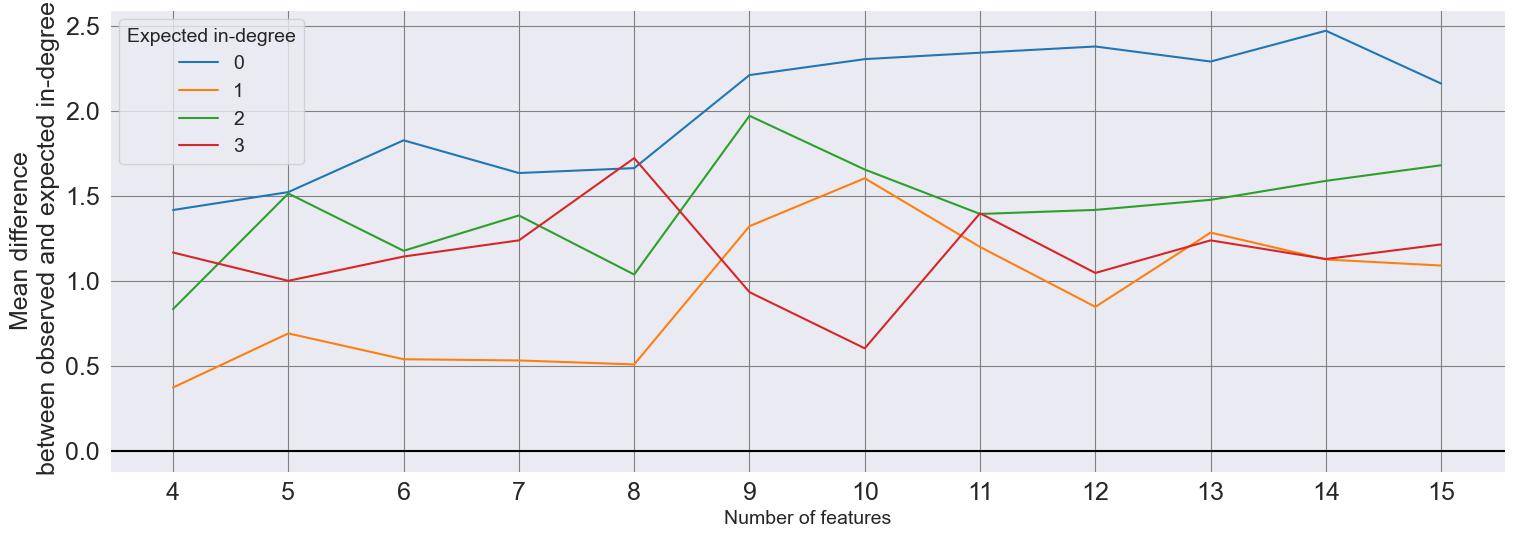

In [66]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

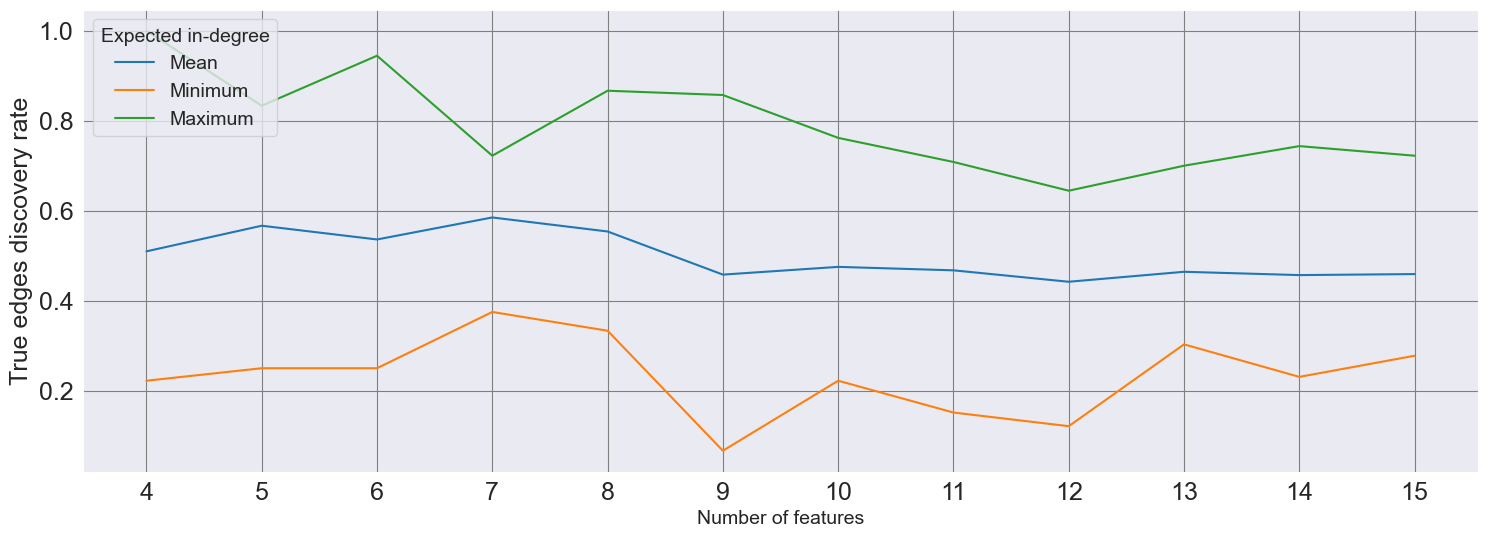

In [69]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

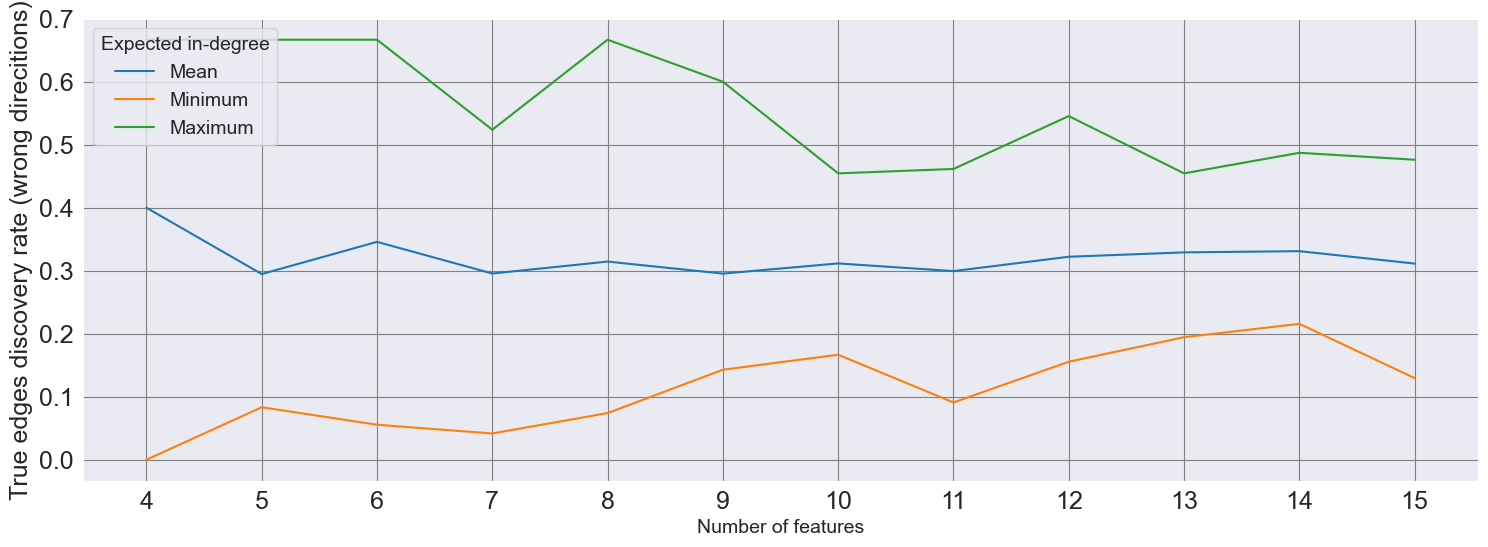

In [95]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

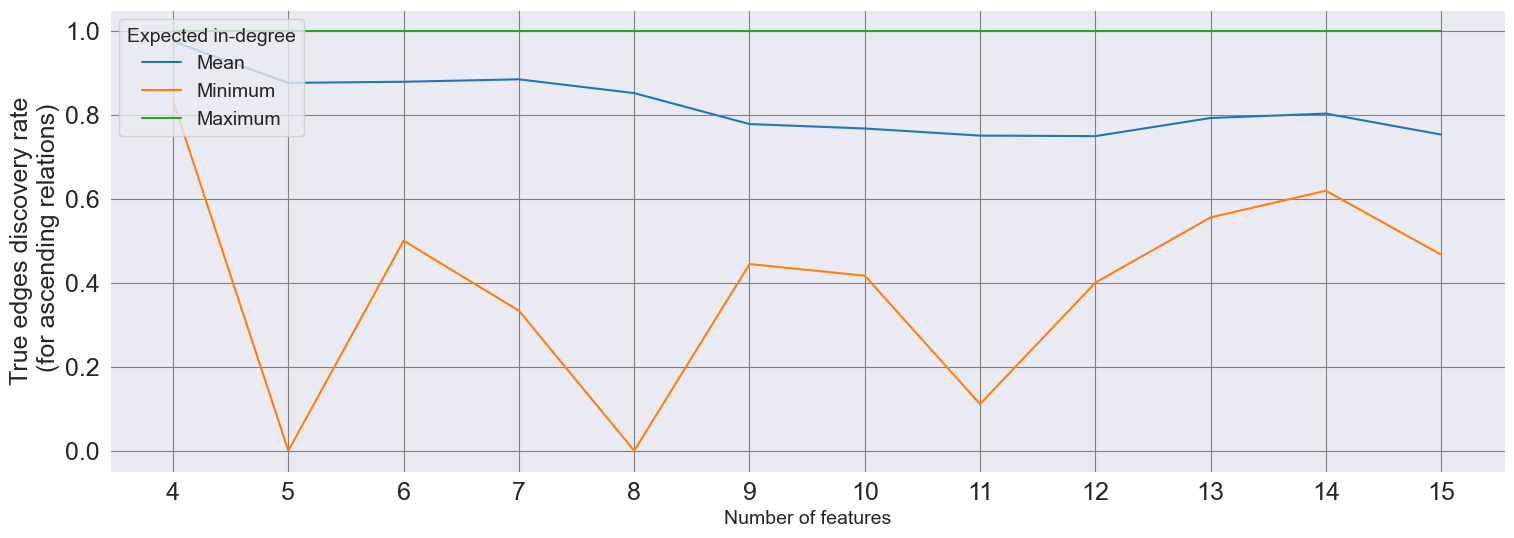

In [70]:
plot(['mean_asc', 'min_asc', 'max_asc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

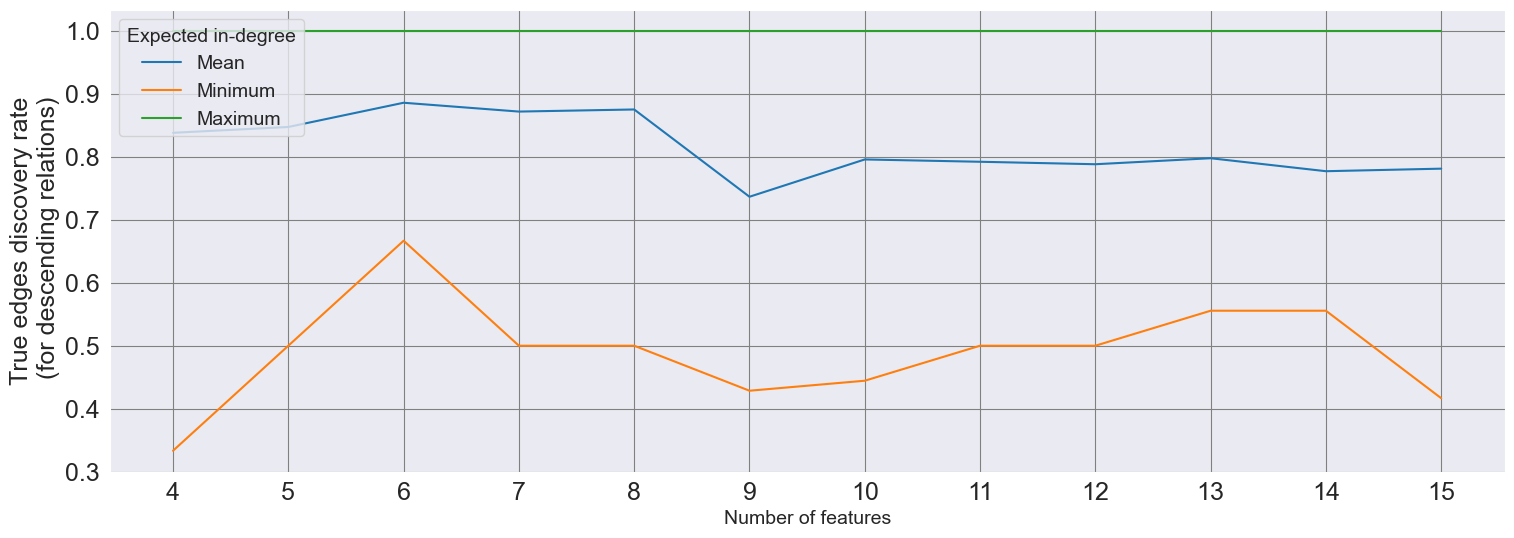

In [71]:
plot(['mean_desc', 'min_desc', 'max_desc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

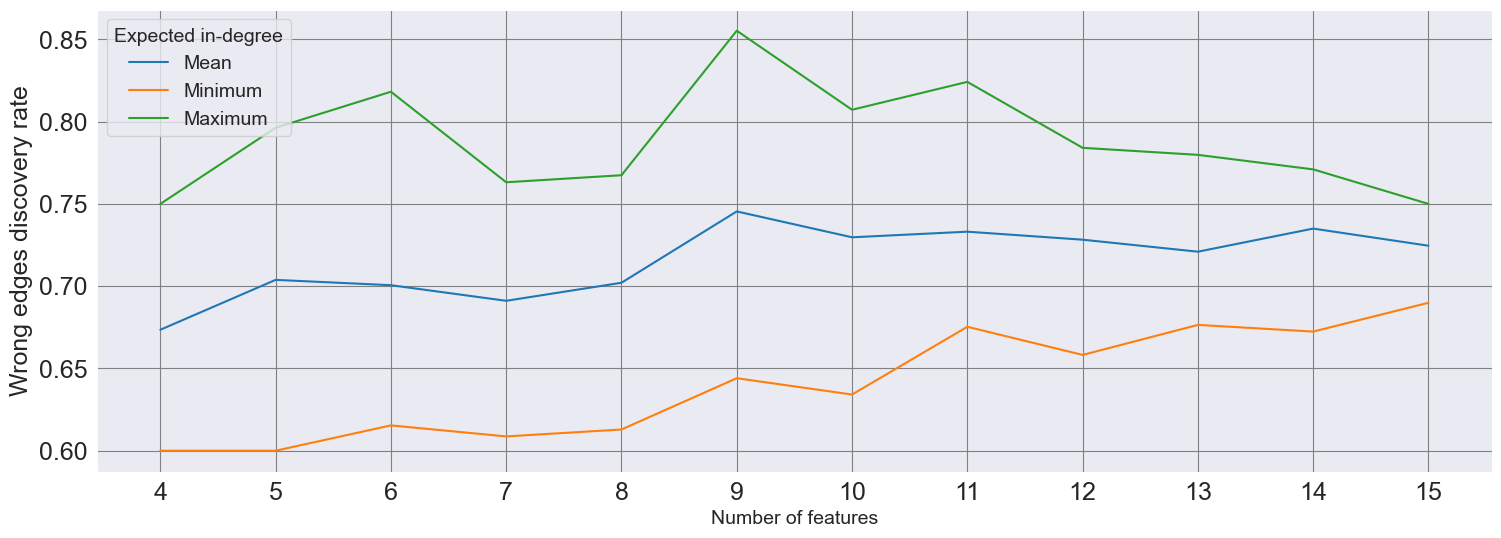

In [72]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

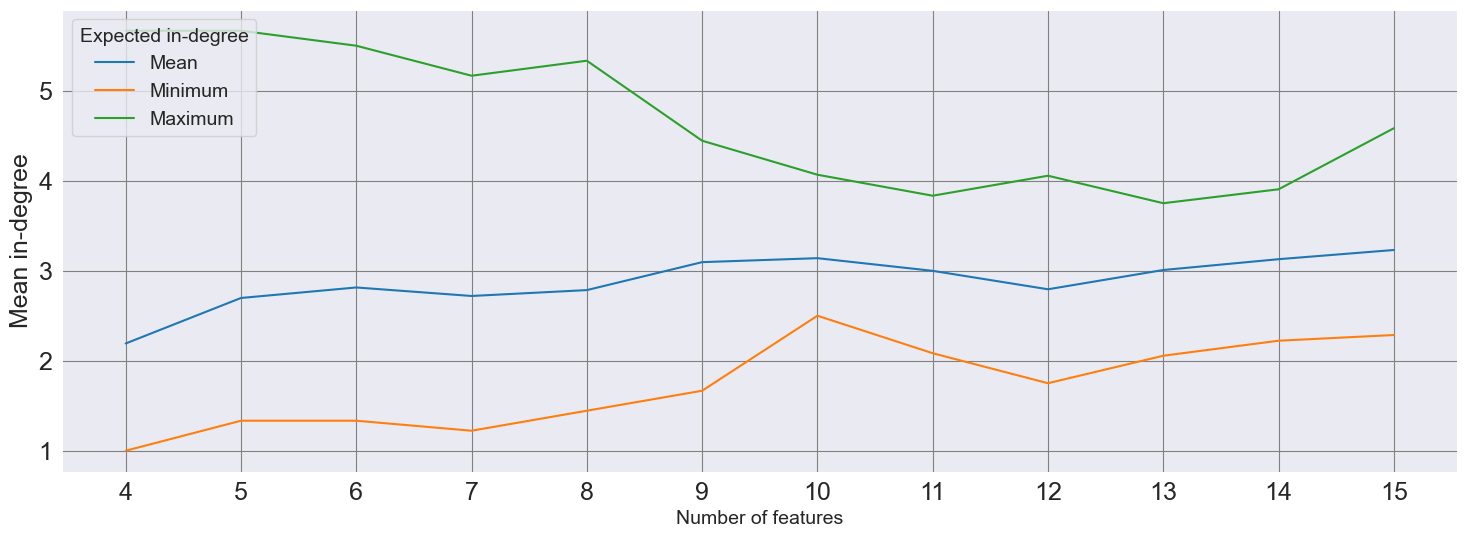

In [73]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [12]:
print(res.iloc[:, 18:23].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  indegree for actual 0 indegree &  indegree for actual 1 indegree &  indegree for actual 2 indegree &  indegree for actual 3 indegree &  indegree for actual 4 indegree \\
\midrule
0  &                        1.416667 &                        1.371795 &                        2.833333 &                        4.166667 &                            -inf \\
1  &                        1.522222 &                        1.690476 &                        3.513889 &                        4.000000 &                        3.833333 \\
2  &                        1.826944 &                        1.538462 &                        3.176768 &                        4.142857 &                        3.333333 \\
3  &                        1.634444 &                        1.531250 &                        3.384615 &                        4.238095 &                        4.750000 \\
4  &                        1.663333 &                        1.507937 &      

In [15]:
table1 = list()
for i in tqdm_notebook(range(4, 16)):
    #print(f"{i} nodes")
    print("")
    table1.append([i]+ex3aux.simulation(i, scoring=("K2", K2Score), transitive_mode=True,  construction_method=construct_by_kmeans, n_trials=30))

  0%|          | 0/12 [00:00<?, ?it/s]


22 30 31

26 30 31

25 30 31

28 30 31

29 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31


In [16]:
res1 = pd.DataFrame([table1[k] for k in range(len(table1))], columns=['n_feat']+cols)
res1

,n_feat,mean_right_dir,ci95_low_right_dir,ci95_high_right_dir,ci99_low_right_dir,ci99_high_right_dir,mean_wrong_dir,ci95_low_wrong_dir,ci95_high_wrong_dir,ci99_low_wrong_dir,...,mean_wrong_edges,ci95_low_wrong_edges,ci95_high_wrong_edges,ci99_low_wrong_edges,ci99_high_wrong_edges,mean_indegree,ci95_low_indegree,ci95_high_indegree,ci99_low_indegree,ci99_high_indegree
0,4,0.542593,0.468658,0.616528,0.442949,0.642236,0.361111,0.296940,0.425283,0.274626,...,0.678573,0.661906,0.695241,0.656110,0.701036,2.261111,1.848721,2.673501,1.705327,2.816895
1,5,0.578704,0.520946,0.636461,0.500863,0.656545,0.297963,0.248704,0.347222,0.231576,...,0.701336,0.682587,0.720085,0.676068,0.726604,2.868519,2.462536,3.274501,2.321370,3.415668
2,6,0.560370,0.495746,0.624995,0.473275,0.647466,0.321746,0.266383,0.377109,0.247132,...,0.706746,0.687613,0.725880,0.680960,0.732533,2.833333,2.407913,3.258754,2.259988,3.406679
3,7,0.590119,0.537919,0.642319,0.519768,0.660470,0.276667,0.237098,0.316235,0.223340,...,0.700740,0.682625,0.718854,0.676326,0.725153,2.935185,2.550887,3.319484,2.417260,3.453110
4,8,0.590719,0.531205,0.650233,0.510511,0.670927,0.292059,0.242467,0.341652,0.225223,...,0.701899,0.687438,0.716360,0.682410,0.721388,2.979630,2.518884,3.440375,2.358676,3.600583
5,9,0.371738,0.300790,0.442686,0.276121,0.467356,0.287691,0.241333,0.334049,0.225214,...,0.662942,0.643923,0.681961,0.637310,0.688575,3.194444,2.957744,3.431145,2.875439,3.513449
6,10,0.373526,0.323827,0.423224,0.306546,0.440505,0.282706,0.248749,0.316664,0.236942,...,0.652268,0.637491,0.667046,0.632353,0.672184,3.248704,3.042225,3.455183,2.970429,3.526978
7,11,0.382919,0.334050,0.431788,0.317058,0.448781,0.269302,0.243563,0.295040,0.234614,...,0.652953,0.638857,0.667048,0.633956,0.671949,3.144537,2.949267,3.339807,2.881368,3.407706
8,12,0.377816,0.322897,0.432735,0.303801,0.451831,0.261234,0.227296,0.295172,0.215495,...,0.645380,0.627785,0.662975,0.621667,0.669093,3.033920,2.809766,3.258074,2.731824,3.336016
9,13,0.357820,0.315719,0.399922,0.301079,0.414561,0.304318,0.276446,0.332190,0.266755,...,0.640358,0.626869,0.653846,0.622179,0.658536,3.102227,2.930335,3.274118,2.870566,3.333887


In [17]:
res1.to_csv('kmeans_feature_dependence_k2_transitive_v2.csv')

In [18]:

table2 = list()
for i in tqdm_notebook(range(4, 16)):
    #print(f"{i} nodes")
    print("")
    table2.append([i]+ex3aux.simulation(i, scoring=("K2", BicScore), construction_method=construct_by_kmeans, n_trials=30))

  0%|          | 0/12 [00:00<?, ?it/s]


22 30 31

26 30 31

25 30 31

28 30 31

29 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31


In [19]:
res2 = pd.DataFrame([table2[k] for k in range(len(table2))], columns=['n_feat']+cols)
res2

,n_feat,mean_right_dir,ci95_low_right_dir,ci95_high_right_dir,ci99_low_right_dir,ci99_high_right_dir,mean_wrong_dir,ci95_low_wrong_dir,ci95_high_wrong_dir,ci99_low_wrong_dir,...,mean_wrong_edges,ci95_low_wrong_edges,ci95_high_wrong_edges,ci99_low_wrong_edges,ci99_high_wrong_edges,mean_indegree,ci95_low_indegree,ci95_high_indegree,ci99_low_indegree,ci99_high_indegree
0,4,0.550000,0.447521,0.652479,0.411888,0.688112,0.345370,0.249735,0.441006,0.216481,...,0.649776,0.634380,0.665173,0.629026,0.670527,1.955556,1.670627,2.240484,1.571554,2.339557
1,5,0.519815,0.453381,0.586249,0.430281,0.609349,0.331111,0.266712,0.395510,0.244320,...,0.655434,0.639118,0.671749,0.633445,0.677422,2.296296,2.034611,2.557982,1.943619,2.648974
2,6,0.504048,0.422358,0.585738,0.393953,0.614142,0.353571,0.276589,0.430554,0.249821,...,0.653359,0.636087,0.670631,0.630082,0.676637,2.300000,2.011285,2.588715,1.910894,2.689106
3,7,0.499841,0.444944,0.554739,0.425855,0.573828,0.340476,0.299042,0.381910,0.284635,...,0.660196,0.642400,0.677993,0.636211,0.684181,2.302778,2.043184,2.562371,1.952920,2.652636
4,8,0.580123,0.522782,0.637465,0.502844,0.657403,0.268263,0.227946,0.308580,0.213927,...,0.651654,0.633563,0.669745,0.627273,0.676036,2.291667,2.059449,2.523884,1.978704,2.604630
5,9,0.397018,0.338796,0.455241,0.318551,0.475486,0.300351,0.268434,0.332267,0.257336,...,0.683691,0.664541,0.702840,0.657883,0.709499,2.400556,2.272773,2.528338,2.228341,2.572770
6,10,0.431788,0.382320,0.481256,0.365119,0.498457,0.295054,0.253695,0.336412,0.239314,...,0.667719,0.653022,0.682416,0.647912,0.687526,2.367593,2.240163,2.495022,2.195853,2.539332
7,11,0.430560,0.378201,0.482919,0.359995,0.501124,0.284222,0.248346,0.320098,0.235871,...,0.675962,0.657668,0.694255,0.651307,0.700616,2.382817,2.250369,2.515266,2.204314,2.561321
8,12,0.441643,0.388784,0.494503,0.370404,0.512883,0.276109,0.243118,0.309100,0.231647,...,0.662564,0.645881,0.679247,0.640080,0.685048,2.249555,2.106154,2.392956,2.056291,2.442818
9,13,0.410817,0.360827,0.460807,0.343445,0.478189,0.312033,0.276719,0.347347,0.264440,...,0.665961,0.652856,0.679065,0.648299,0.683622,2.334943,2.231187,2.438698,2.195110,2.474776


In [20]:
res2.to_csv('kmeans_feature_dependence_bic_v2.csv')

In [21]:
table3 = list()
for i in tqdm_notebook(range(4, 16)):
    #print(f"{i} nodes")
    print("")
    table3.append([i]+ex3aux.simulation(i, scoring=("K2", BicScore), transitive_mode=True, construction_method=construct_by_kmeans, n_trials=30))

  0%|          | 0/12 [00:00<?, ?it/s]


22 30 31

26 30 31

25 30 31

28 30 31

29 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31

30 30 31


In [22]:
res3 = pd.DataFrame([table3[k] for k in range(len(table3))], columns=['n_feat']+cols)
res3

,n_feat,mean_right_dir,ci95_low_right_dir,ci95_high_right_dir,ci99_low_right_dir,ci99_high_right_dir,mean_wrong_dir,ci95_low_wrong_dir,ci95_high_wrong_dir,ci99_low_wrong_dir,...,mean_wrong_edges,ci95_low_wrong_edges,ci95_high_wrong_edges,ci99_low_wrong_edges,ci99_high_wrong_edges,mean_indegree,ci95_low_indegree,ci95_high_indegree,ci99_low_indegree,ci99_high_indegree
0,4,0.550000,0.447521,0.652479,0.411888,0.688112,0.345370,0.249735,0.441006,0.216481,...,0.649776,0.634380,0.665173,0.629026,0.670527,1.955556,1.670627,2.240484,1.571554,2.339557
1,5,0.519815,0.453381,0.586249,0.430281,0.609349,0.331111,0.266712,0.395510,0.244320,...,0.655434,0.639118,0.671749,0.633445,0.677422,2.296296,2.034611,2.557982,1.943619,2.648974
2,6,0.504048,0.422358,0.585738,0.393953,0.614142,0.353571,0.276589,0.430554,0.249821,...,0.653359,0.636087,0.670631,0.630082,0.676637,2.300000,2.011285,2.588715,1.910894,2.689106
3,7,0.499841,0.444944,0.554739,0.425855,0.573828,0.340476,0.299042,0.381910,0.284635,...,0.660196,0.642400,0.677993,0.636211,0.684181,2.302778,2.043184,2.562371,1.952920,2.652636
4,8,0.580123,0.522782,0.637465,0.502844,0.657403,0.268263,0.227946,0.308580,0.213927,...,0.651654,0.633563,0.669745,0.627273,0.676036,2.291667,2.059449,2.523884,1.978704,2.604630
5,9,0.320414,0.261596,0.379232,0.241144,0.399684,0.247035,0.216751,0.277319,0.206221,...,0.603132,0.586341,0.619924,0.580502,0.625763,2.453148,2.306766,2.599531,2.255866,2.650430
6,10,0.331437,0.291517,0.371357,0.277637,0.385238,0.238700,0.214818,0.262582,0.206513,...,0.593950,0.574523,0.613377,0.567768,0.620132,2.447698,2.310372,2.585025,2.262621,2.632776
7,11,0.315882,0.274977,0.356787,0.260753,0.371011,0.242476,0.213144,0.271809,0.202945,...,0.603667,0.586330,0.621003,0.580302,0.627032,2.431958,2.305133,2.558782,2.261034,2.602881
8,12,0.326768,0.277632,0.375905,0.260546,0.392990,0.225043,0.197088,0.252998,0.187368,...,0.599186,0.582726,0.615647,0.577002,0.621370,2.391993,2.254835,2.529150,2.207144,2.576842
9,13,0.329614,0.292913,0.366315,0.280152,0.379076,0.242420,0.212949,0.271891,0.202701,...,0.589733,0.573895,0.605570,0.568388,0.611077,2.395547,2.290327,2.500766,2.253741,2.537353


In [23]:
res3.to_csv('kmeans_feature_dependence_bic_transitive_v2.csv')

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

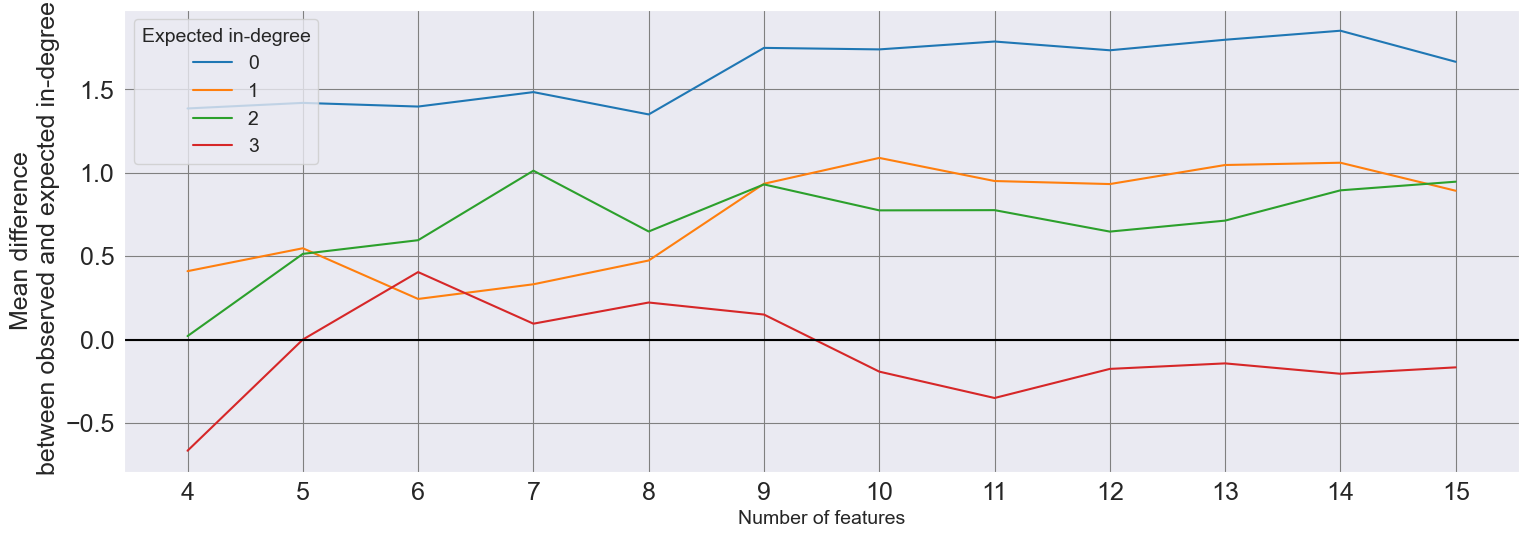

In [88]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res3[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

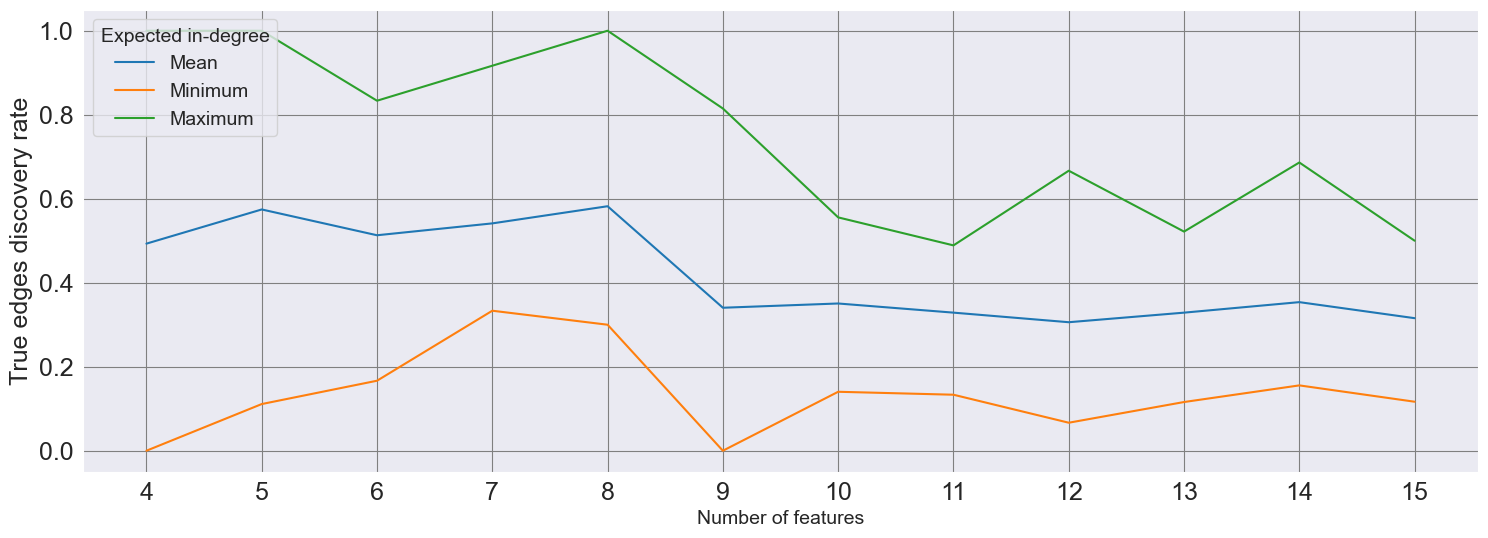

In [89]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

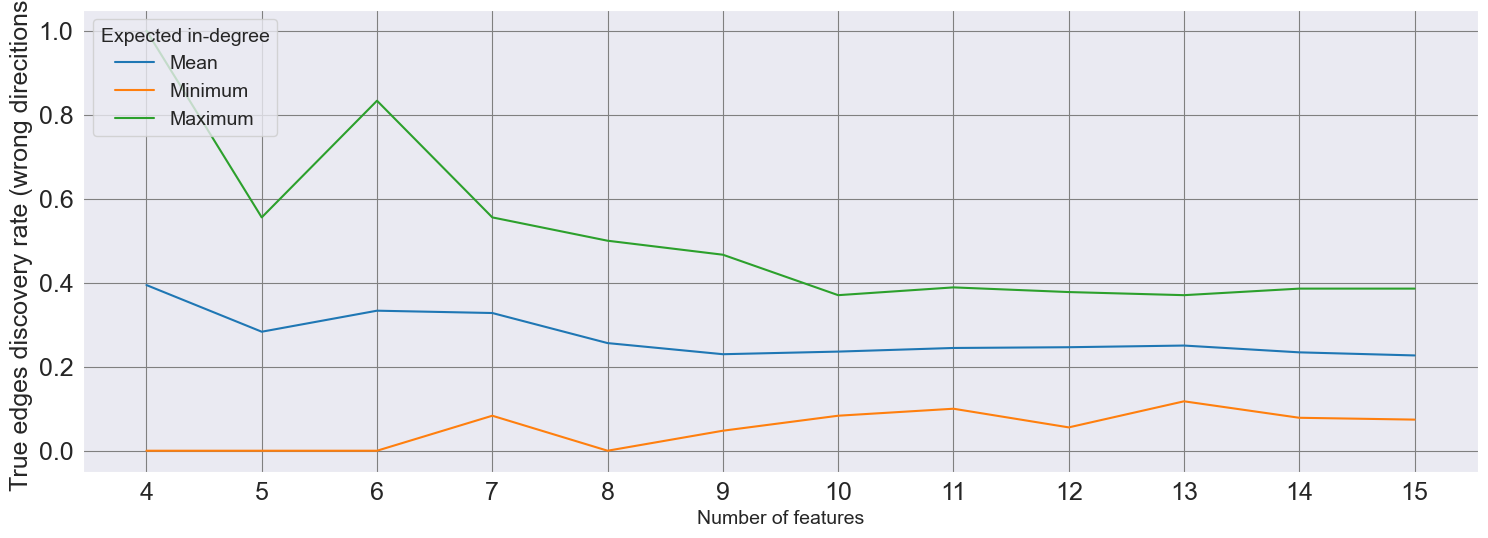

In [90]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

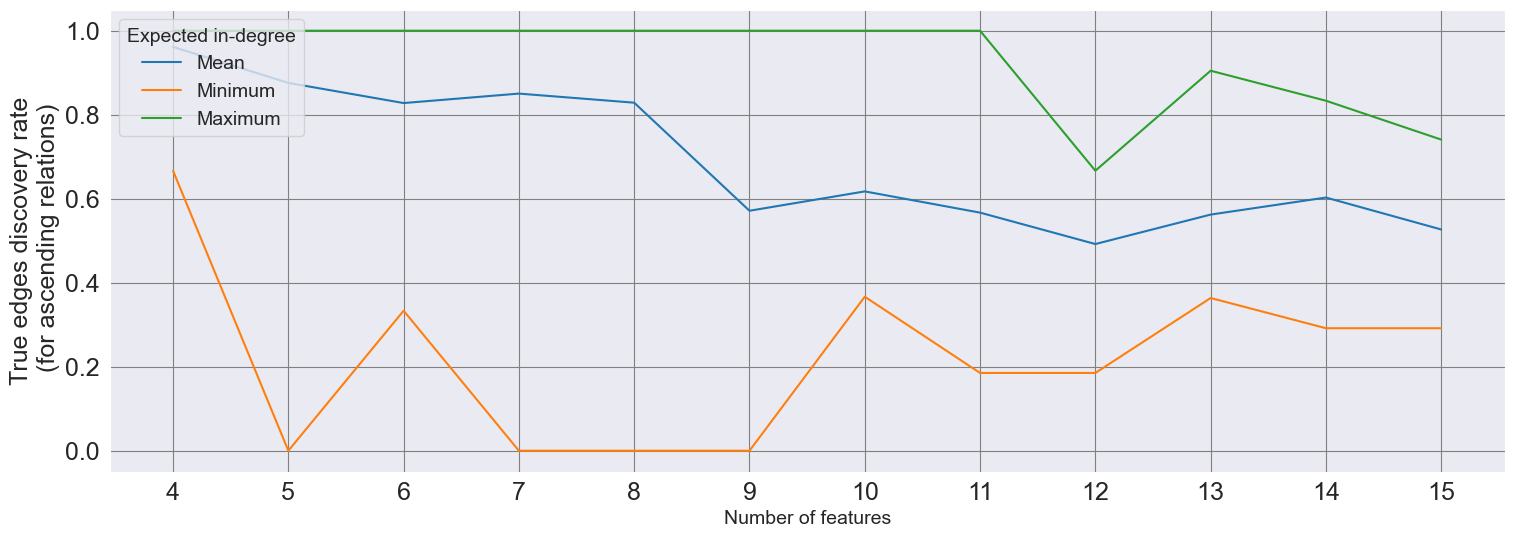

In [91]:
plot(['mean_asc', 'min_asc', 'max_asc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

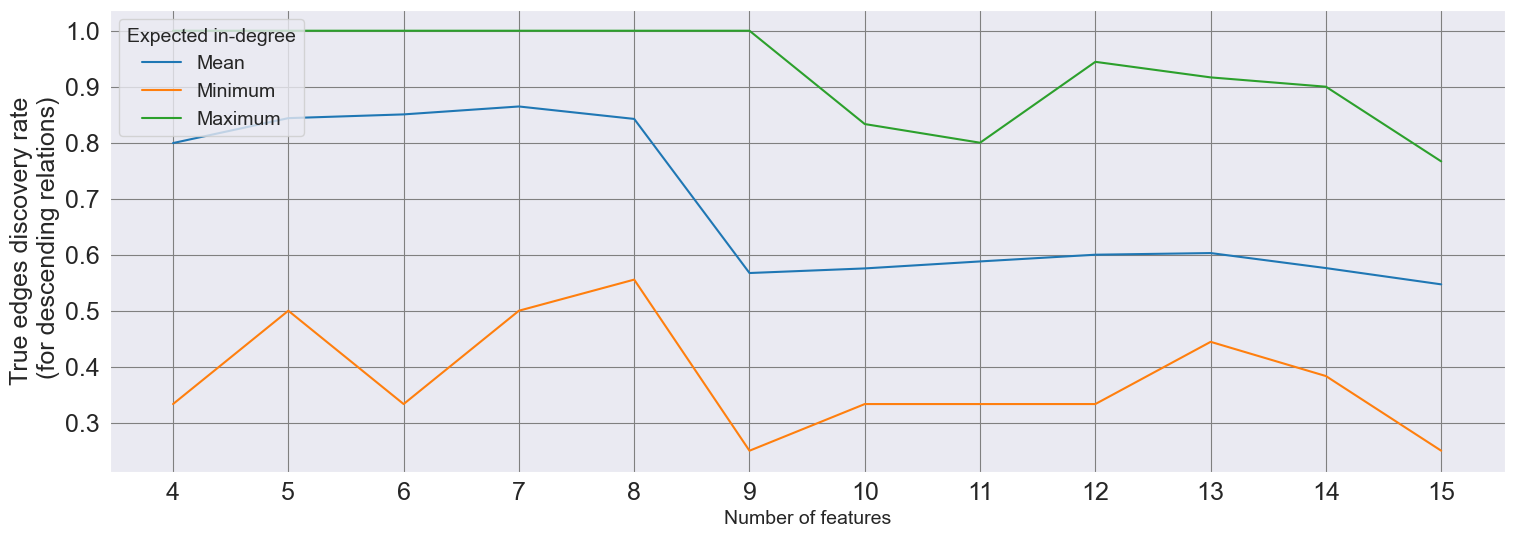

In [92]:
plot(['mean_desc', 'min_desc', 'max_desc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

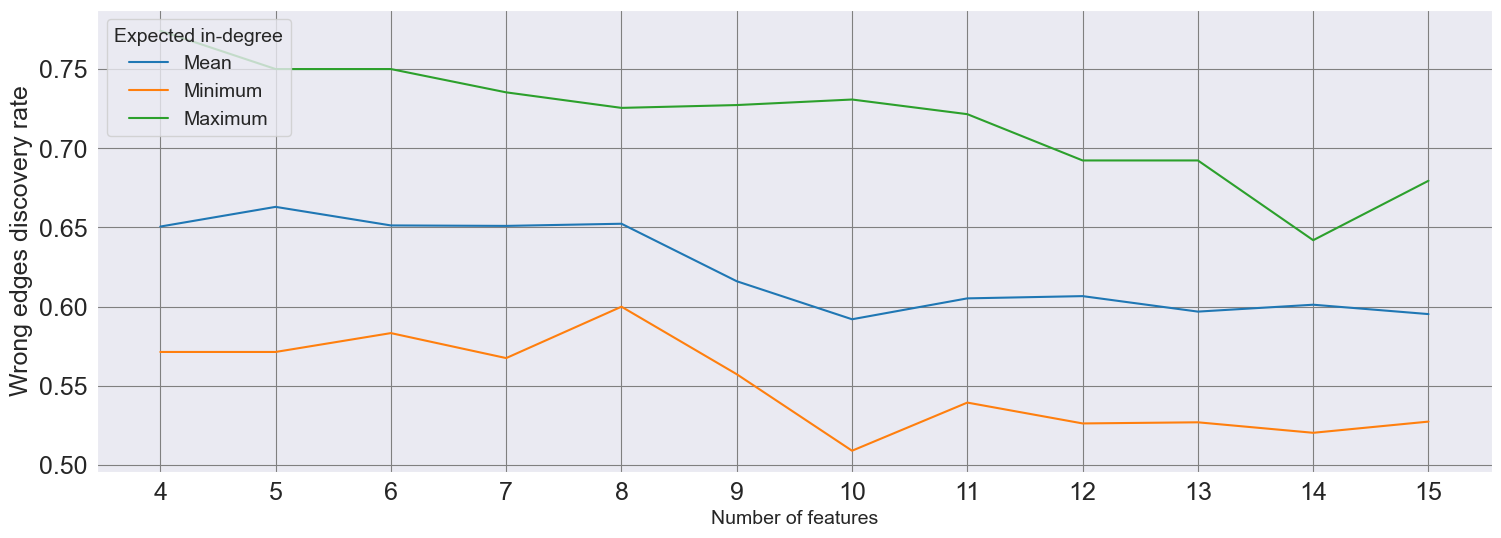

In [93]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res3, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

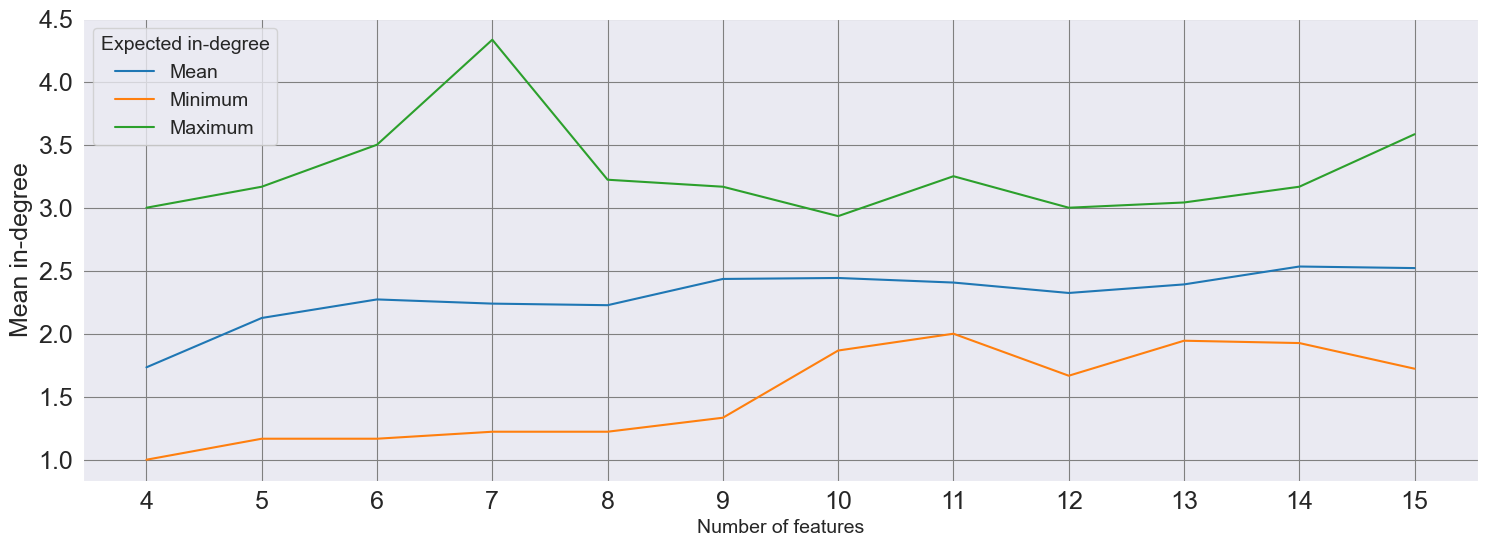

In [94]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res3, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [38]:
table4 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table4.append(ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_uniform))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [52]:
res4 = pd.DataFrame([table4[k] for k in range(12)], columns=cols)
res4

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.470833,0.083333,0.833333,0.390278,0.166667,0.666667,0.910256,0.666667,1.000000,0.807099,...,1.448718,2.458333,3.333333,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.540833,0.222222,0.833333,0.342500,0.083333,0.666667,0.901961,0.000000,1.000000,0.875000,...,1.559524,3.013889,3.777778,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.527817,0.250000,0.750000,0.328095,0.055556,0.500000,0.856250,0.333333,1.000000,0.858772,...,1.525641,3.141414,4.309524,3.000000,4.333333,-inf,-inf,-inf,-inf,-inf
3,0.558651,0.266667,0.933333,0.292996,0.066667,0.555556,0.851235,0.000000,1.000000,0.841111,...,1.399306,3.487179,3.809524,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.533571,0.250000,0.800000,0.319616,0.166667,0.555556,0.836257,0.000000,1.000000,0.866111,...,1.279762,2.868056,4.722222,3.666667,4.666667,-inf,-inf,-inf,-inf,-inf
5,0.389473,0.208333,0.619048,0.326769,0.166667,0.555556,0.751667,0.333333,1.000000,0.678968,...,1.996199,3.521296,4.016667,3.600000,-inf,-inf,-inf,-inf,-inf,-inf
6,0.426161,0.190476,0.714286,0.333517,0.151515,0.571429,0.742500,0.416667,1.000000,0.775060,...,2.381871,3.624269,3.410256,2.666667,8.000000,-inf,-inf,-inf,-inf,-inf
7,0.446759,0.181818,0.708333,0.292673,0.181818,0.476190,0.718333,0.333333,1.000000,0.767956,...,2.140833,3.842593,3.991453,3.625000,-inf,-inf,-inf,-inf,-inf,-inf
8,0.422293,0.151515,0.766667,0.305210,0.166667,0.571429,0.716349,0.400000,1.000000,0.747163,...,2.039286,3.286728,4.013889,3.366667,3.000000,6.0,-inf,-inf,-inf,-inf
9,0.392219,0.181818,0.629630,0.352534,0.190476,0.545455,0.756171,0.500000,1.000000,0.751337,...,2.285556,3.257310,3.547619,4.444444,5.666667,-inf,-inf,-inf,-inf,-inf


([<matplotlib.axis.XTick at 0x1c883583310>,
 [Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

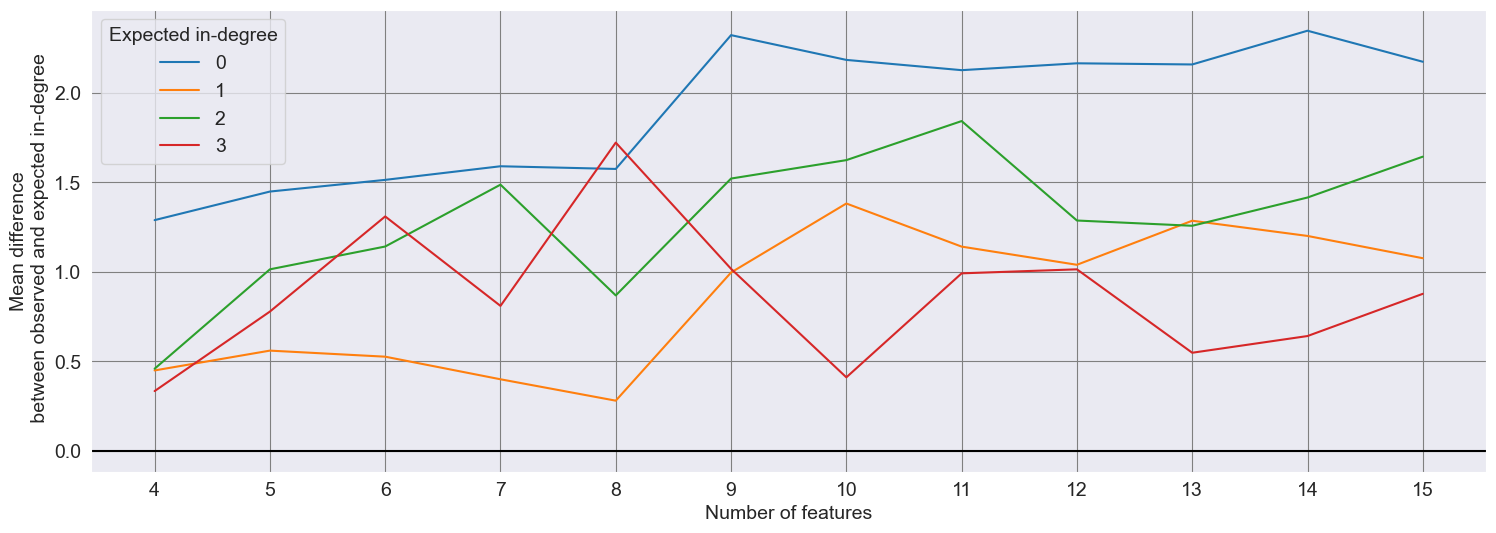

In [54]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res4[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree")
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x)